This notebook contains the code for sampling the dataset and creating the subset sample file for Annotators

For a balanced representation of randomnly sampled subset, it should have a balanced representation from each segment and topic class

In [ ]:
import pandas as pd
#ReadingMuseData
#Read the entire muse dataset into df
fields=['id','segment_id', 'label_topic', 'text']
train=pd.read_csv("Final_Train_Muse.csv", usecols=fields) #give the muse train pathmake sure you have incorporated text columns
devel=pd.read_csv("Final_Devel_Muse.csv", usecols=fields) #give the muse devel path make sure you have incorporated text columns
muse=pd.concat([train,devel],axis=0)
df=muse.drop_duplicates()
display(df)

,id,segment_id,label_topic,text
0,23.0,1.0,6.0,"This is a BMW , a 60 M5 . It was introduced in..."
1,23.0,2.0,7.0,"This is a 2005 car , and it cost when you 86,0..."
2,23.0,3.0,1.0,Thesixty M5 was only available with an automat...
4,23.0,4.0,2.0,As with the case of them cars . It has a reall...
5,23.0,5.0,4.0,Extinct traction handy when you got over 500 h...
...,...,...,...,...
4287,303.0,10.0,6.0,So which vehicles compete with the 2012 BMW S6...
4288,303.0,11.0,7.0,"It could easily go over $105,000 ."
4289,303.0,12.0,0.0,"If you want great fuel economy , you better of..."
4290,303.0,13.0,7.0,The 2012 BMW 6 50 i coop offers a boatload of ...


Study data distribution for a well balanced subset

Visualizing Topic Wise Sample distribution

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

topic_numbers [830, 523, 570, 497, 787, 149, 1022, 389, 238, 502]


<Axes: >

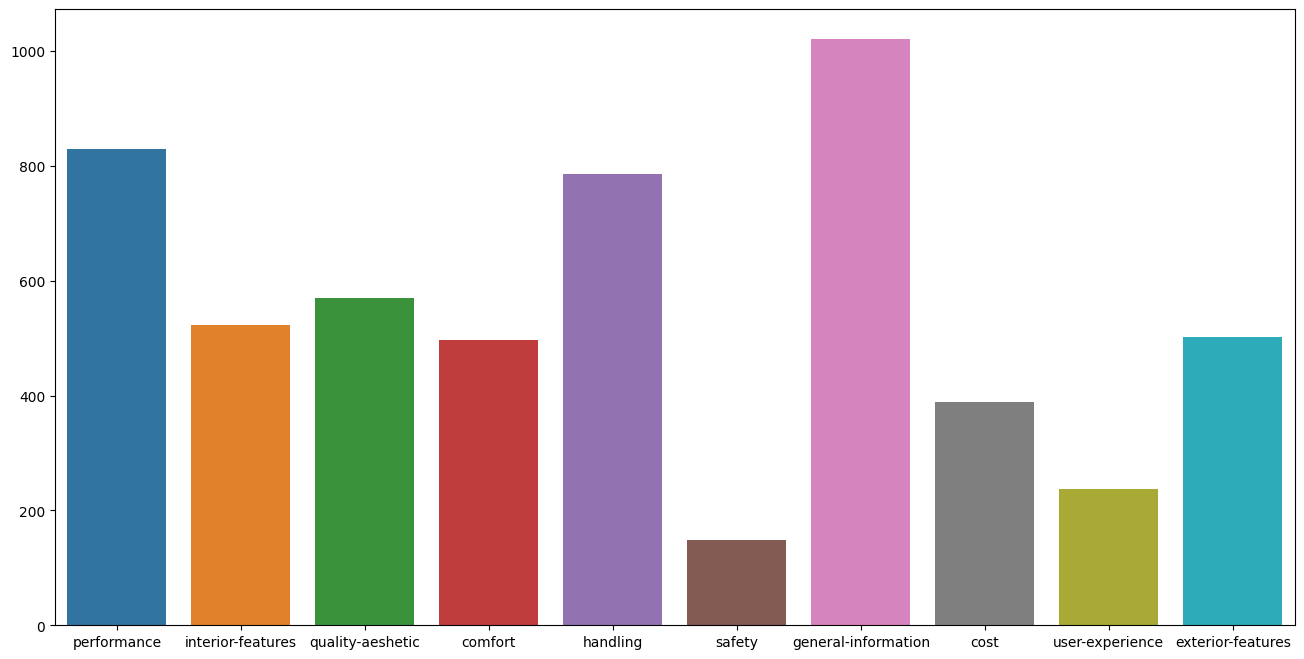

In [ ]:
topicnames=['performance',
'interior-features',
'quality-aeshetic',
'comfort',
'handling',
'safety',
'general-information',
'cost',
'user-experience',
'exterior-features']
topic_numbers=list(df.groupby('label_topic').count()['id'])
print("topic_numbers",topic_numbers)
chart = plt.figure(figsize=(16,8))
sns.barplot(x=topicnames,
            y=topic_numbers)

Get the maximum No. of data to be sampled

In [ ]:
#look at the topic distribution of segment text across the dataset
data_topic_count=df.groupby(['label_topic']).count()
print("topic data count")
display(data_topic_count)
#calculate the 10 percentage of each topic
topic_10_percent=df.groupby(['label_topic']).count()['id']*0.1
print("<-----------No. of Samples Required from each Topic---->\n",topic_10_percent) # rounding it off gives the amount of rows to be sampled from each topic for a balanced representation of the dataset

print("<------------------Total of. datapoints sampled------------>\n",int(topic_10_percent.sum()))
print("sampled dataset percentage", round(int(topic_10_percent.sum())/len(df)*100))

topic data count


,id,segment_id,text
label_topic,,,
0.0,830,830,830
1.0,523,523,523
2.0,570,570,570
3.0,497,497,497
4.0,787,787,787
5.0,149,149,149
6.0,1022,1022,1022
7.0,389,389,389
8.0,238,238,238


<-----------No. of Samples Required from each Topic---->
 label_topic
0.0     83.0
1.0     52.3
2.0     57.0
3.0     49.7
4.0     78.7
5.0     14.9
6.0    102.2
7.0     38.9
8.0     23.8
9.0     50.2
Name: id, dtype: float64
<------------------Total of. datapoints sampled------------>
 550
sampled dataset percent 10


SAMPLING! Now that we know what and how much to sample- let's sample!

get the first sample for the first topic

In [ ]:
import pandas as pd

import math
# Load a all rows dataframe for topic 0
df_topic=df.loc[df["label_topic"]==0.0]

# Select 10 percent random rows
sample_df_0 = df_topic.sample(n=math.ceil(len(df_topic)*0.1))
sample_df_0
my_df=sample_df_0

repeat for the rest of the topics from 1.0 to 9.0 and add to the initail sampe my_df

In [ ]:
import math
for i in range(1,10):
  #get rowspertaing to a datatset
  df_topic=df.loc[df["label_topic"]==i]

# Select 10% random rows
  sample_df = df_topic.sample(n=math.ceil(len(df_topic)*0.1))
#add to the sample
  my_df=pd.concat([my_df,sample_df], axis=0)

shuffle

In [ ]:

# drop  four extra  rows
my_df=my_df[0:550]
#shuufles the rows of the dataframe
my_df.sample(frac = 1).reset_index(drop=True)
my_df

,id,segment_id,label_topic,text
946,220.0,13.0,0.0,You might think the base four cylinder engine ...
5759,160.0,3.0,0.0,Powering the 2019 Z4 is going to be a two litr...
1376,50.0,10.0,0.0,So we've now done 50 miles in economy mode and...
1755,61.0,2.0,0.0,It's powered by 6.6 liter V 12 Twin Turbo with...
7059,187.0,6.0,0.0,Let's do a quick little acceleration with the ...
...,...,...,...,...
4263,106.0,3.0,9.0,Look at it's absolutely giant enormous . Look ...
11099,273.0,28.0,9.0,The optional majors led headlamps been shut of...
10503,263.0,22.0,9.0,Front brakes are standard with 19 inch wheels ...
676,36.0,5.0,9.0,this one's got laser lights with some cool blu...


Save to Annotator File and start with annotations for first 100 rows to form annotation guidelines, gradually increase sample size -early stop till satisfactory inter-annotater agreement achieved. (See Annotation Protocol in Paper)

In [ ]:
#save the subset sampled file to be distributed among annotators.
my_df.to_csv("Sampled_annotator_file.csv")
# Get the first 100 rows for establish annotation guidelines.
#Increase Sample size incremental fashion from the subset sampled till the desired inter-annotator agreement is acheived
#Look at the attached files.